In [1]:
import pandas as pd
import numpy as np 

In [2]:
x = np.array([1,2])
x

array([1, 2])

In [5]:
beta = np.array([4,3])
beta

array([4, 3])

In [6]:
np.dot(beta,x)

10

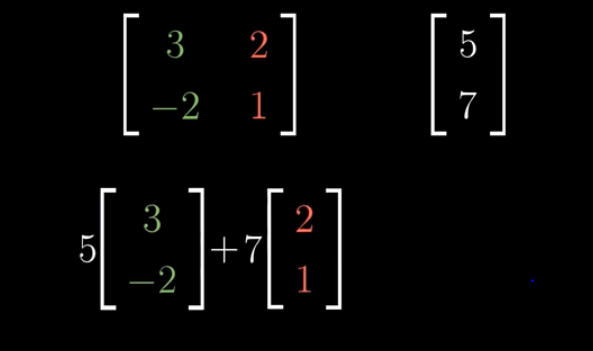

technically linear transformation is finding out where the i hat and j hat lands which is shown in the the 2x2 matrix or the transformtation function, and then scaling by the vector u have to find the resultant vector

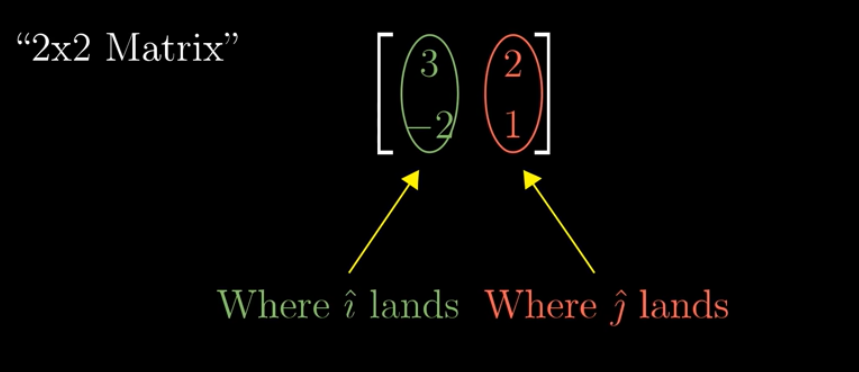

In [2]:
def predict_outcome(weight,feature):
    #want to give predictions given a set of features and the weights
    
    return np.dot(feature,weight)

In [40]:
x = np.array([[1,2],[3,4],[5,6]])
weights = np.array([5,1])
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [41]:
predict_outcome(weights,x)

array([ 7, 19, 31])

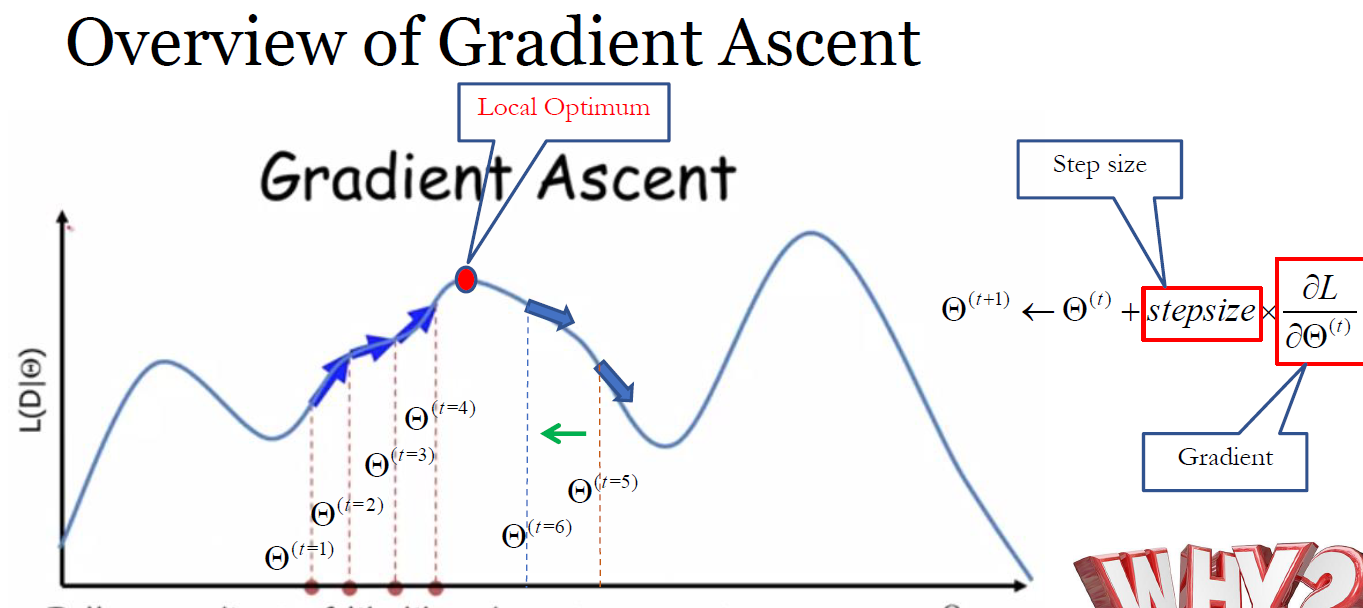

gradient descent is trying to move the objective function to the direction that is scaled by the slope so that it tells u how much to move

for linear regression, the objective function we want to __minimise is the sum of squared error which is measured by the actual y - predicted y__

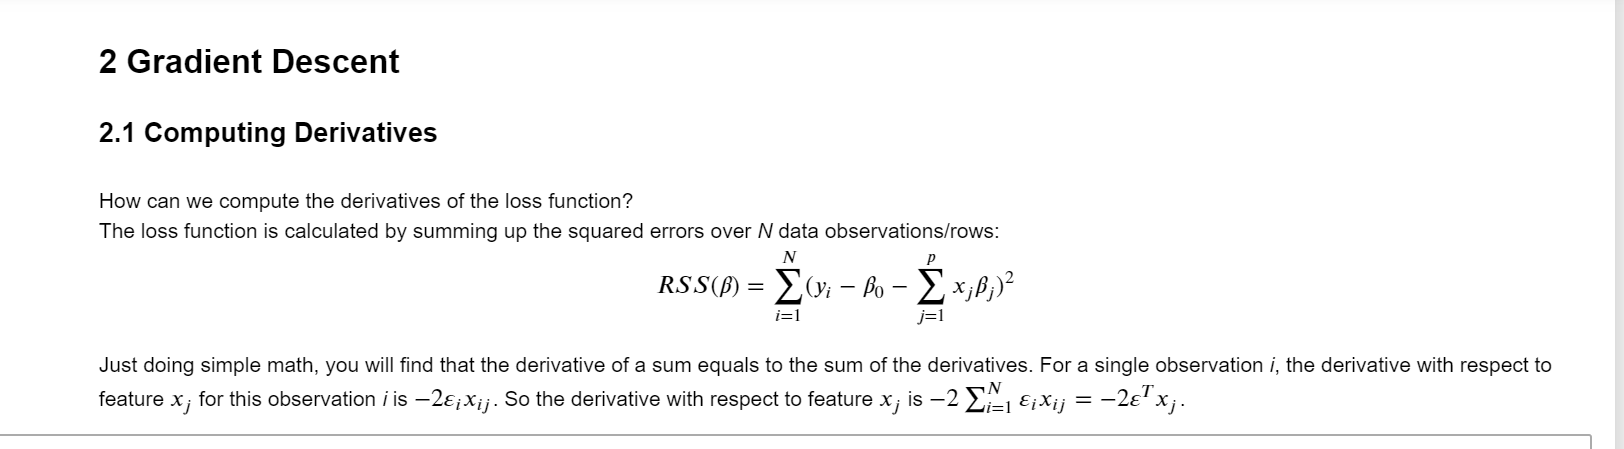

In [3]:
def derivative(feature_matrix,error_matrix):
    return -2* np.dot(np.transpose(error_matrix),feature_matrix)

In [49]:
#creating own test
features = np.array([[1,2],[0.75,4]])
weights = np.array([2,4])
actual = np.array([2,5])
errors = actual - predict_outcome(weights,features)
print("The feature matrix is \n{}".format(features))
print("The weights matrix is \n{}".format(weights))
print("The actual matrix is \n{}".format(actual))
print("The errors matrix is \n{}".format(errors))
print("The derivative is \n{}".format(derivative(features,errors)))

The feature matrix is 
[[1.   2.  ]
 [0.75 4.  ]]
The weights matrix is 
[2 4]
The actual matrix is 
[2 5]
The errors matrix is 
[ -8.  -12.5]
The derivative is 
[ 34.75 132.  ]


In [23]:
def gradient_descent(feature_matrix,weights,actual,step_size,tol,n):
    #iterate and then recalculate the objective function
    for i in range(n):
        pred = predict_outcome(weights,feature_matrix)
        error = actual - pred
        #getting the derivative since we want to minimise the objective function
        dx = derivative(feature_matrix,error)
        weights = weights - step_size* dx
            
        #we want the sqrt of the sum of squared derivatives so that if the derivative is negative we can deal w it
        sqrd_sum = np.sum(np.power(dx,2))
        sqrt_dx = np.sqrt(sqrd_sum)
        #print(sqrt_dx , tol)
        if sqrt_dx <= tol:
            return weights
    return weights
            
            
    

In [52]:
predict_outcome(gradient_descent(features,weights,actual,0.01,0.000000001,1000),features)

array([2.0027281, 4.9985327])

here, we can see that this is v close to desired actual output (: